## Train a model with bike rental data using XGBoost algorithm
### Training log1p(count) dataset
###  Model is trained with XGBoost installed in notebook instance
###  In the later examples, we will train using SageMaker's XGBoost algorithm

In [ ]:
# Install xgboost in notebook instance.
#### Command to install xgboost
!conda install -y -c conda-forge xgboost

In [1]:
%matplotlib inline
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb

In [2]:
column_list_file = 'bike_train_column_list.txt'
train_file = 'bike_train.csv'
validation_file = 'bike_validation.csv'
test_file = 'bike_test.csv'

In [3]:
columns = ''
with open(column_list_file,'r') as f:
    columns = f.read().split(',')

In [4]:
columns

['count',
 'season',
 'holiday',
 'workingday',
 'weather',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'year',
 'month',
 'day',
 'dayofweek',
 'hour']

In [5]:
# Specify the column names as the file does not have column header
df_train = pd.read_csv(train_file,names=columns)
df_validation = pd.read_csv(validation_file,names=columns)

In [6]:
df_train.head()

,count,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour
0,4.477337,3,0,0,2,26.24,30.305,73,7.0015,2011,9,3,5,0
1,5.517453,3,0,1,1,32.80,34.850,33,7.0015,2012,8,13,0,14
2,5.814131,4,0,0,1,15.58,19.695,40,11.0014,2011,11,5,5,17
3,6.436150,3,0,1,1,32.80,37.880,55,12.9980,2012,8,9,3,19
4,4.262680,2,0,1,1,13.94,17.425,76,7.0015,2011,4,14,3,6


In [7]:
df_validation.head()

,count,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour
0,6.095825,3,0,1,2,28.70,33.335,79,12.9980,2011,7,7,3,8
1,5.961005,2,0,0,1,32.80,37.880,55,12.9980,2011,6,11,5,13
2,1.098612,1,0,1,1,14.76,16.665,40,19.9995,2011,2,14,0,2
3,3.891820,1,0,1,1,9.02,9.090,47,36.9974,2011,2,8,1,10
4,4.025352,4,0,0,1,10.66,15.150,87,0.0000,2011,12,4,6,8


In [8]:
X_train = df_train.iloc[:,1:] # Features: 1st column onwards 
y_train = df_train.iloc[:,0].ravel() # Target: 0th column

X_validation = df_validation.iloc[:,1:]
y_validation = df_validation.iloc[:,0].ravel()

In [9]:
# XGBoost Training Parameter Reference: 
#   https://github.com/dmlc/xgboost/blob/master/doc/parameter.md
regressor = xgb.XGBRegressor(max_depth=5,eta=0.1,subsample=0.7,num_round=150)

In [10]:
regressor

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, eta=0.1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=5, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None, num_round=150,
       objective='reg:linear', random_state=0, reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=None, silent=True, subsample=0.7)

In [11]:
regressor.fit(X_train,y_train, eval_set = [(X_train, y_train), (X_validation, y_validation)])

[0]	validation_0-rmse:3.90451	validation_1-rmse:3.91509
[1]	validation_0-rmse:3.52514	validation_1-rmse:3.53464
[2]	validation_0-rmse:3.18459	validation_1-rmse:3.19291
[3]	validation_0-rmse:2.87826	validation_1-rmse:2.88517
[4]	validation_0-rmse:2.60242	validation_1-rmse:2.60836
[5]	validation_0-rmse:2.35546	validation_1-rmse:2.36028
[6]	validation_0-rmse:2.13469	validation_1-rmse:2.1396
[7]	validation_0-rmse:1.93541	validation_1-rmse:1.94049
[8]	validation_0-rmse:1.75647	validation_1-rmse:1.76096
[9]	validation_0-rmse:1.59662	validation_1-rmse:1.60069
[10]	validation_0-rmse:1.45314	validation_1-rmse:1.45792
[11]	validation_0-rmse:1.32606	validation_1-rmse:1.3304
[12]	validation_0-rmse:1.2107	validation_1-rmse:1.21475
[13]	validation_0-rmse:1.1052	validation_1-rmse:1.11107
[14]	validation_0-rmse:1.01324	validation_1-rmse:1.01971
[15]	validation_0-rmse:0.927716	validation_1-rmse:0.935562
[16]	validation_0-rmse:0.854276	validation_1-rmse:0.862233
[17]	validation_0-rmse:0.788699	validatio

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, eta=0.1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=5, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None, num_round=150,
       objective='reg:linear', random_state=0, reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=None, silent=True, subsample=0.7)

In [12]:
df_train['count'].describe()

count    7620.000000
mean        4.583886
std         1.429959
min         0.693147
25%         3.737670
50%         4.976734
75%         5.652489
max         6.885510
Name: count, dtype: float64

In [13]:
eval_result = regressor.evals_result()

In [14]:
training_rounds = range(len(eval_result['validation_0']['rmse']))

In [15]:
print(training_rounds)

range(0, 100)


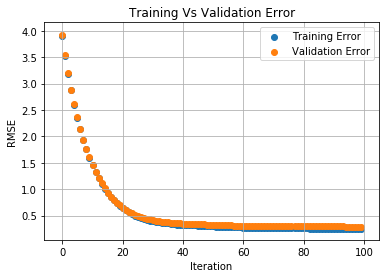

In [16]:
plt.scatter(x=training_rounds,y=eval_result['validation_0']['rmse'],label='Training Error')
plt.scatter(x=training_rounds,y=eval_result['validation_1']['rmse'],label='Validation Error')
plt.grid(True)
plt.xlabel('Iteration')
plt.ylabel('RMSE')
plt.title('Training Vs Validation Error')
plt.legend()

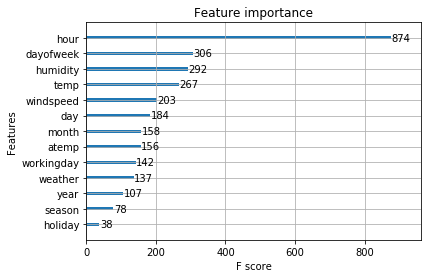

In [17]:
xgb.plot_importance(regressor)

In [18]:
df = pd.read_csv('bike_all.csv')

In [19]:
df.head()

,count,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour
0,2.833213,1,0,0,1,9.84,14.395,81,0.0,2011,1,1,5,0
1,3.713572,1,0,0,1,9.02,13.635,80,0.0,2011,1,1,5,1
2,3.496508,1,0,0,1,9.02,13.635,80,0.0,2011,1,1,5,2
3,2.639057,1,0,0,1,9.84,14.395,75,0.0,2011,1,1,5,3
4,0.693147,1,0,0,1,9.84,14.395,75,0.0,2011,1,1,5,4


In [20]:
X_test = df.iloc[:,1:]
print(X_test[:5])

   season  holiday  workingday  weather  temp   atemp  humidity  windspeed  \
0       1        0           0        1  9.84  14.395        81        0.0   
1       1        0           0        1  9.02  13.635        80        0.0   
2       1        0           0        1  9.02  13.635        80        0.0   
3       1        0           0        1  9.84  14.395        75        0.0   
4       1        0           0        1  9.84  14.395        75        0.0   

   year  month  day  dayofweek  hour  
0  2011      1    1          5     0  
1  2011      1    1          5     1  
2  2011      1    1          5     2  
3  2011      1    1          5     3  
4  2011      1    1          5     4  


In [21]:
result = regressor.predict(X_test)

In [22]:
result[:5]

array([3.1718059, 3.206772 , 2.9364595, 1.934494 , 1.0758984],
      dtype=float32)

In [23]:
df.head()

,count,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour
0,2.833213,1,0,0,1,9.84,14.395,81,0.0,2011,1,1,5,0
1,3.713572,1,0,0,1,9.02,13.635,80,0.0,2011,1,1,5,1
2,3.496508,1,0,0,1,9.02,13.635,80,0.0,2011,1,1,5,2
3,2.639057,1,0,0,1,9.84,14.395,75,0.0,2011,1,1,5,3
4,0.693147,1,0,0,1,9.84,14.395,75,0.0,2011,1,1,5,4


In [24]:
df['count_predicted'] = result

In [25]:
df.head()

,count,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour,count_predicted
0,2.833213,1,0,0,1,9.84,14.395,81,0.0,2011,1,1,5,0,3.171806
1,3.713572,1,0,0,1,9.02,13.635,80,0.0,2011,1,1,5,1,3.206772
2,3.496508,1,0,0,1,9.02,13.635,80,0.0,2011,1,1,5,2,2.936460
3,2.639057,1,0,0,1,9.84,14.395,75,0.0,2011,1,1,5,3,1.934494
4,0.693147,1,0,0,1,9.84,14.395,75,0.0,2011,1,1,5,4,1.075898


In [26]:
# Negative Values are predicted
df['count_predicted'].describe()

count    10886.000000
mean         4.588523
std          1.381828
min          0.516918
25%          3.751918
50%          4.995625
75%          5.631862
max          6.741621
Name: count_predicted, dtype: float64

In [27]:
df[df['count_predicted'] < 0]

,count,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour,count_predicted


In [28]:
def adjust_count(x):
    if x < 0:
        return 0
    else:
        return x

In [29]:
df['count_predicted'] = df['count_predicted'].map(adjust_count)

In [30]:
df[df['count_predicted'] < 0]

,count,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour,count_predicted


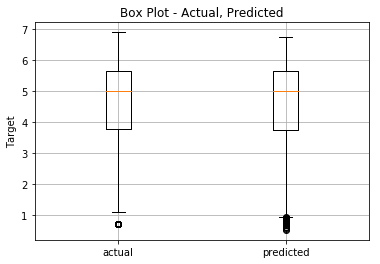

In [31]:
plt.boxplot([df['count'],df['count_predicted']], labels=['actual','predicted'])
plt.title('Box Plot - Actual, Predicted')
plt.ylabel('Target')
plt.grid(True)

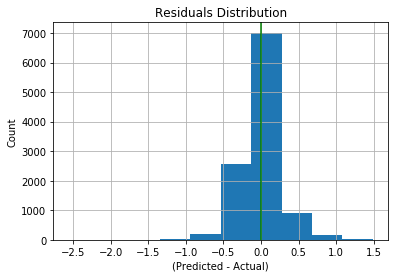

In [32]:
# Over prediction and Under Prediction needs to be balanced
# Training Data Residuals
residuals = (df['count_predicted'] - df['count'])

plt.hist(residuals)
plt.grid(True)
plt.xlabel('(Predicted - Actual)')
plt.ylabel('Count')
plt.title('Residuals Distribution')
plt.axvline(color='g')


In [33]:
import sklearn.metrics as metrics
print("RMSE: {0}".format(metrics.mean_squared_error(df['count'].map(np.expm1),df['count_predicted'].map(np.expm1))**.5))

RMSE: 40.669880407191435


In [34]:
# Metric Use By Kaggle
def compute_rmsle(y_true, y_pred):
    if type(y_true) != np.ndarray:
        y_true = np.array(y_true)
        
    if type(y_pred) != np.ndarray:
        y_pred = np.array(y_pred)
     
    return(np.average((np.log1p(y_pred) - np.log1p(y_true))**2)**.5)

In [35]:
print("RMSLE: {0}".format(compute_rmsle(df['count'].map(np.expm1),df['count_predicted'].map(np.expm1))))

RMSLE: 0.258928947146273


In [36]:
# Prepare Data for Submission to Kaggle
df_test = pd.read_csv(test_file,parse_dates=['datetime'])

In [37]:
df_test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,3,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,3,1
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,3,2
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,3
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,4


In [38]:
X_test =  df_test.iloc[:,1:] # Exclude datetime for prediction

In [39]:
X_test.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour
0,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,3,0
1,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,3,1
2,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,3,2
3,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,3
4,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,4


In [40]:
result = regressor.predict(X_test)

In [41]:
result[:5]

array([2.2819805, 1.7426068, 1.4775771, 1.114629 , 1.0954915],
      dtype=float32)

In [42]:
np.expm1(result)

array([  8.796062 ,   4.7122145,   3.382315 , ..., 116.25582  ,
        91.14392  ,  54.38057  ], dtype=float32)

In [43]:
# Convert result to actual count
df_test["count"] = np.expm1(result)

In [44]:
df_test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour,count
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,3,0,8.796062
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,3,1,4.712214
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,3,2,3.382315
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,3,2.048437
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,4,1.990652


In [45]:
df_test[df_test["count"] < 0]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour,count


In [46]:
df_test[['datetime','count']].to_csv('predicted_count.csv',index=False)

In [ ]:
# RMSLE (Kaggle) Scores
# Test 1: 1.32
# Test 2 (added new feature): 0.61646
# Test 3 0.4